In [1]:
#librerie
import os
from PIL import Image
import numpy as np
import cv2
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
import random as rd
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
# Funzione per leggere le immagini e creare una lista di etichette
def carica_immagini_e_etichette(cartella_principale):
    etichette = []
    immagini = []

    # Scorri le sottocartelle nella cartella principale
    for cartella in os.listdir(cartella_principale):
        cartella_path = os.path.join(cartella_principale, cartella)

        # Verifica che sia una cartella
        if os.path.isdir(cartella_path):
            # Scorri le immagini all'interno della cartella
            for file in os.listdir(cartella_path):
                file_path = os.path.join(cartella_path, file)

                # Verifica che il file sia un'immagine (controlla l'estensione)
                if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                    try:
                        # Apre l'immagine per verificarne la validità
                        img = Image.open(file_path)
                        img.verify()  # Verifica se l'immagine è valida

                        # Aggiungi l'immagine e la sua etichetta (nome della cartella)
                        immagini.append(file_path)
                        etichette.append(cartella)
                    except (IOError, SyntaxError):
                        # Se l'immagine non è valida, la ignora
                        continue

    return immagini, etichette


build a visual vocabulary:


*   sample many (10K to 100K) SIFT descriptors from the images of
the training set (you either use a detector or sample on a grid in the
scale-space);
*  cluster them using k-means (the choice of the number of clusters is
up to you, and you should experiment with different values, but you
could start with a few dozens);
*  collect (and save for future use) the clusters’ centroids which repre-
sent the k 128-dimensional visual words.

In [ ]:
#carico immagini training
cartella_training = '/home/eva/Scrivania/esame_cv/train'
images_training, train_labels  = carica_immagini_e_etichette(cartella_training) #metti la path cartella

In [2]:
images_training = ['/content/train/image_0001.jpg',
                   '/content/train/image_0002.jpg',
                   '/content/train/image_0003.jpg',
                   '/content/train/image_0005.jpg',
                   '/content/train/image_0006.jpg',
                   '/content/train/image_0009.jpg',
                   '/content/train/image_0031.jpg'
                   ]

images_test = ['/content/test/image_0003.jpg',
              '/content/test/image_0004.jpg'
              ]
test_labels = ['Bedroom','Coast']
train_labels = ['Bedroom','Coast','Office','Market','Home','Home','Home']

In [3]:
#SIFT descriptor
all_descriptors = []
k_p = 1000 #prova
for image_path in images_training:
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    sift = cv2.SIFT_create(k_p)
    keypoints, descriptors = sift.detectAndCompute(image, None)
    if descriptors is not None:
        all_descriptors.append(descriptors)
all_descriptors = np.vstack(all_descriptors)

For k = 12
 Mean silhouette_avg = 0.06348024308681488


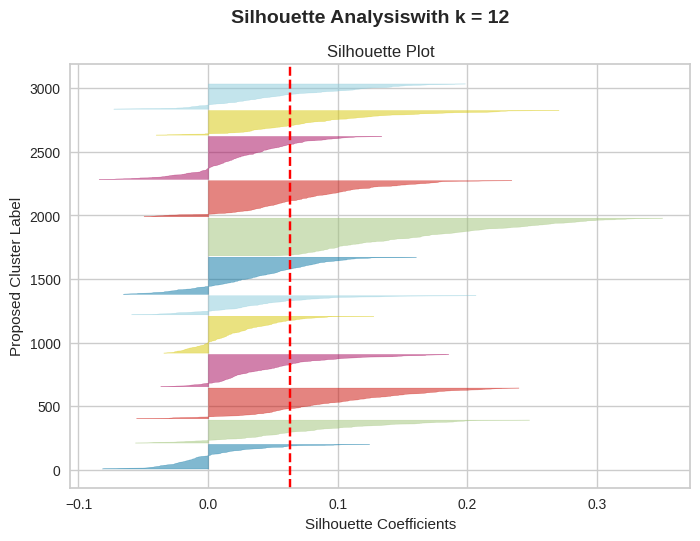

For k = 24
 Mean silhouette_avg = 0.05456900596618652


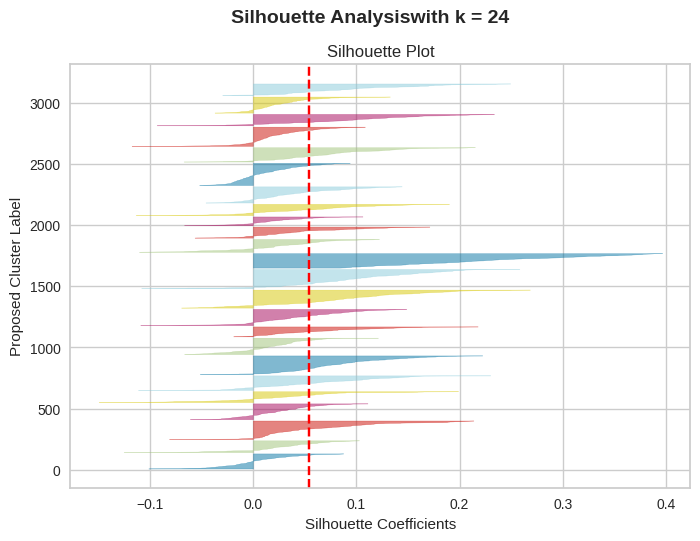

For k = 36
 Mean silhouette_avg = 0.05547769367694855


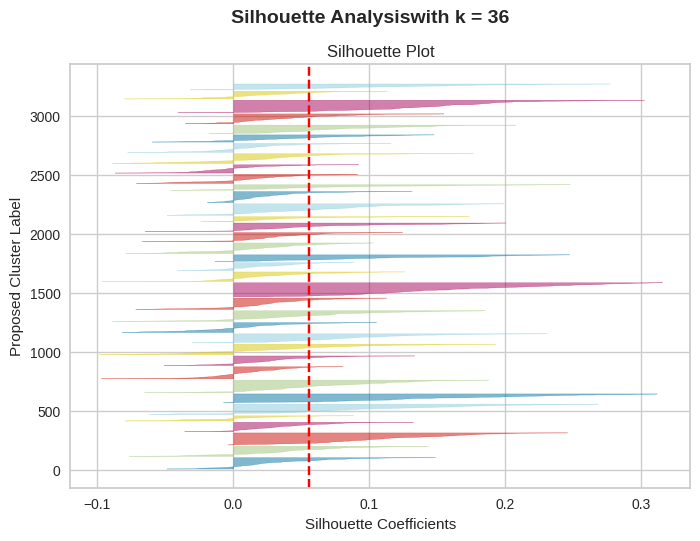

For k = 48
 Mean silhouette_avg = 0.048819560557603836


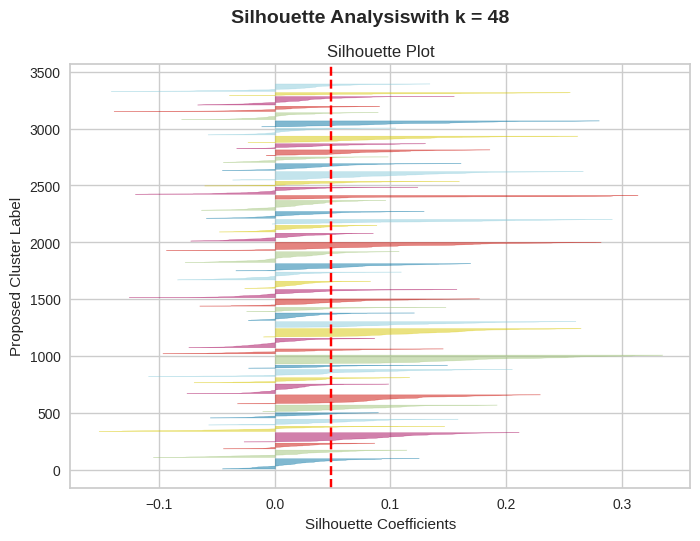

For k = 60
 Mean silhouette_avg = 0.05151044949889183


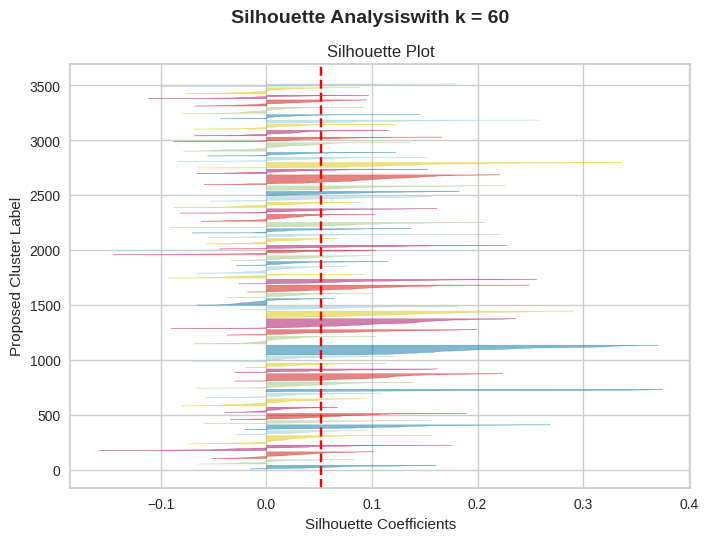

For k = 72
 Mean silhouette_avg = 0.04912656545639038


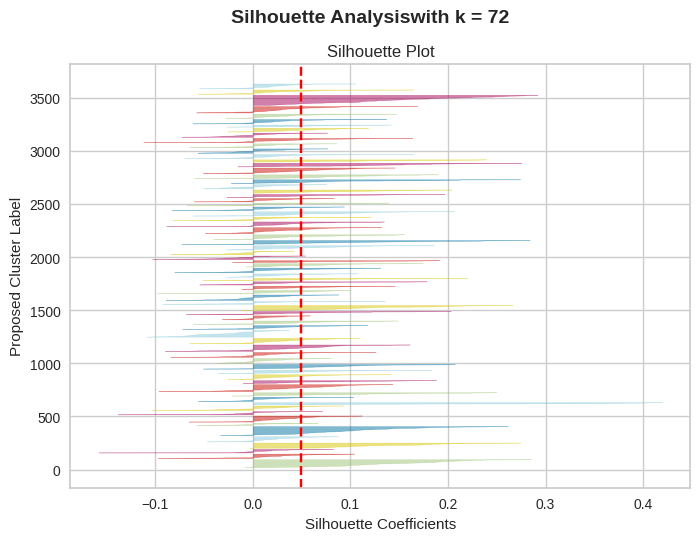

For k = 84
 Mean silhouette_avg = 0.050017986446619034


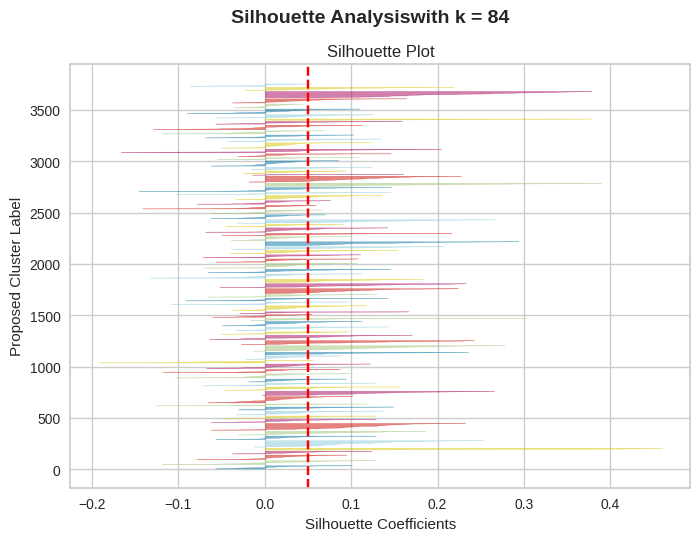

For k = 96
 Mean silhouette_avg = 0.04912682622671127


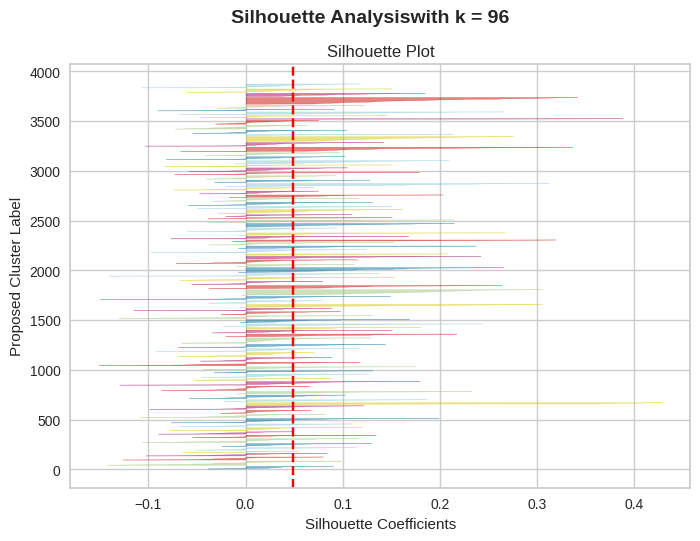

For k = 108
 Mean silhouette_avg = 0.050522979348897934


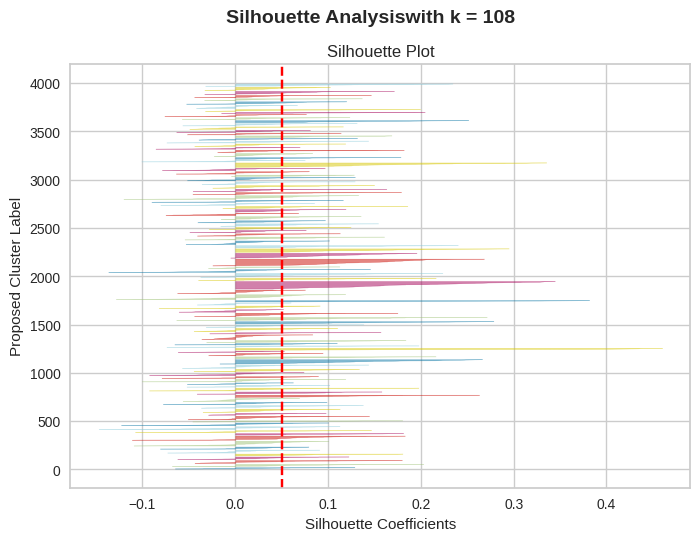

For k = 120
 Mean silhouette_avg = 0.04772192984819412


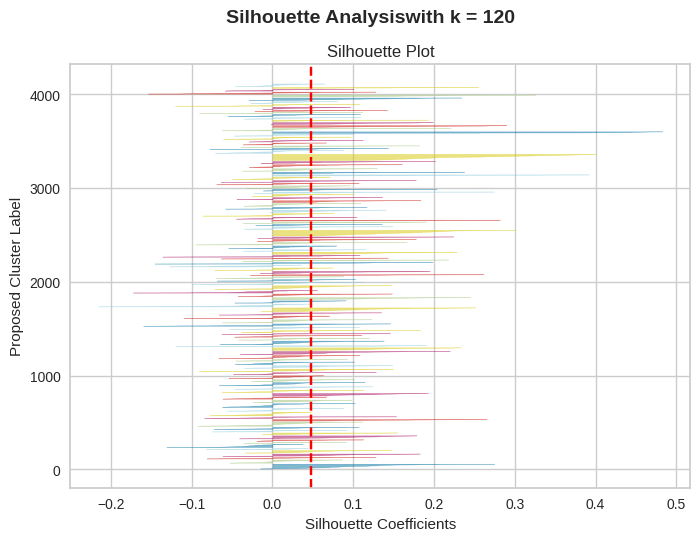

For k = 132
 Mean silhouette_avg = 0.04854946583509445


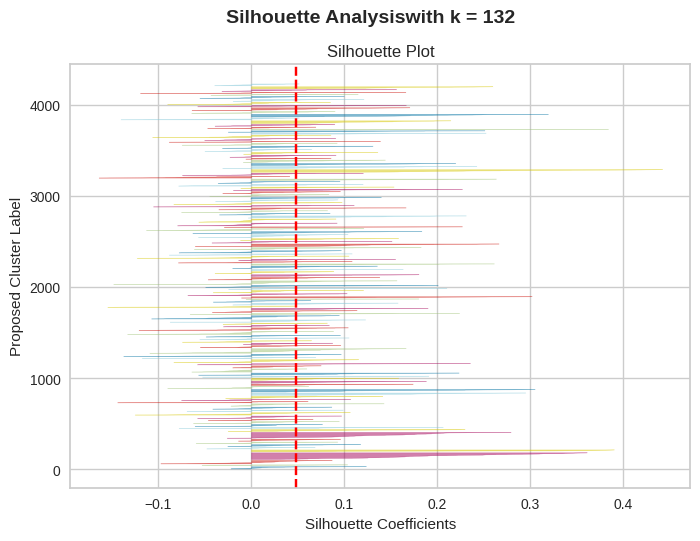

For k = 144
 Mean silhouette_avg = 0.0511026605963707


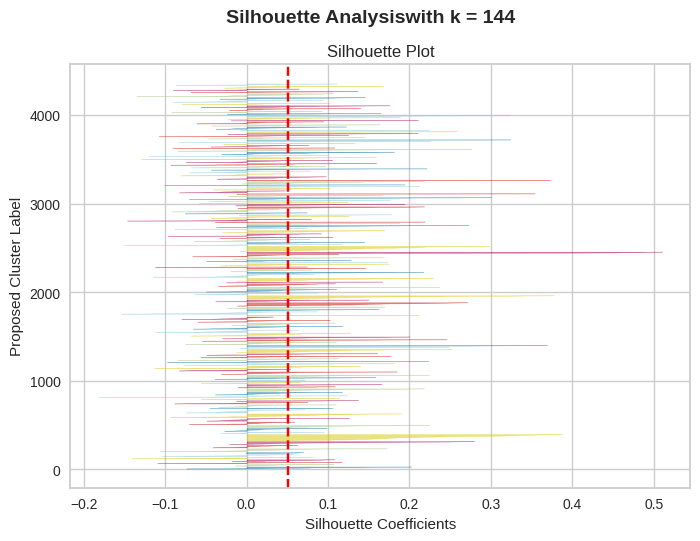

For k = 156
 Mean silhouette_avg = 0.046517569571733475


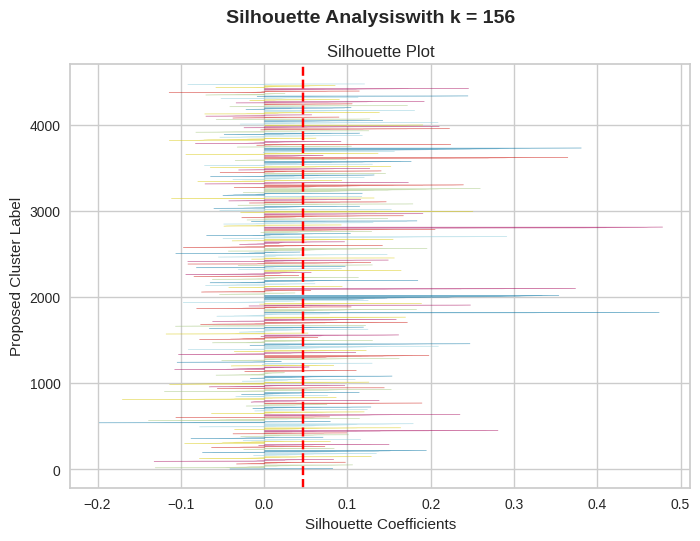

For k = 168
 Mean silhouette_avg = 0.04698669910430908


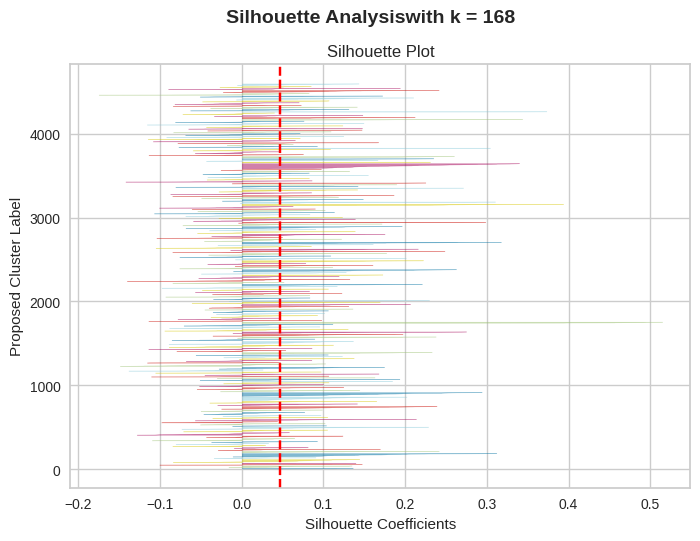

For k = 180
 Mean silhouette_avg = 0.0508878193795681


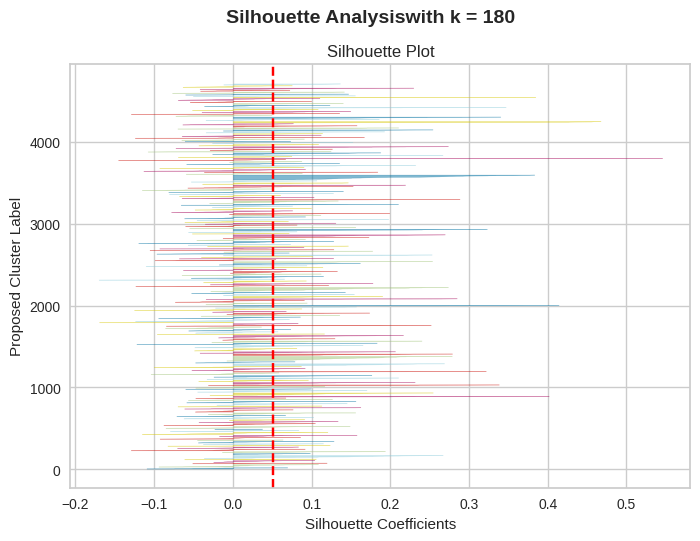

For k = 192
 Mean silhouette_avg = 0.04632033035159111


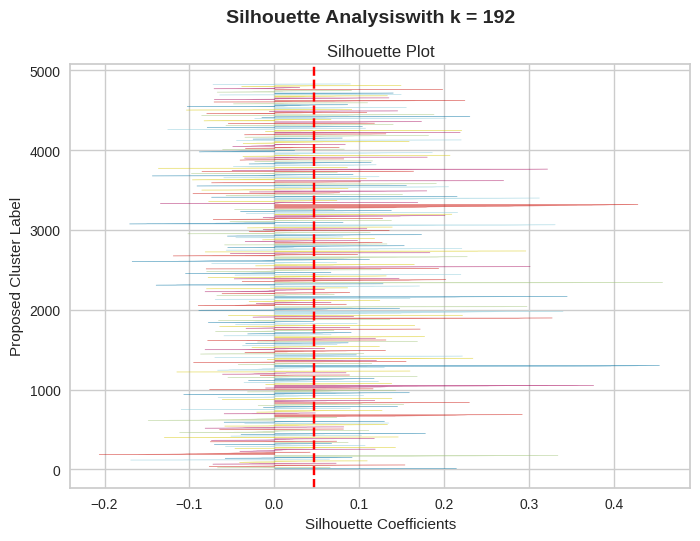

For k = 204
 Mean silhouette_avg = 0.04894685745239258


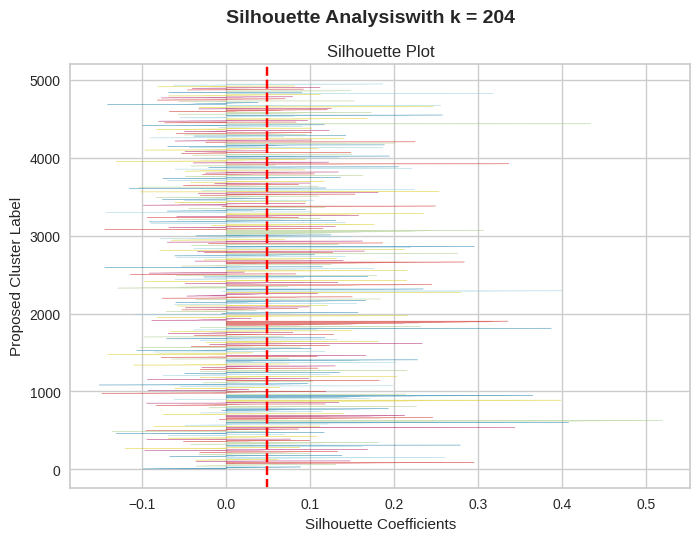

For k = 216
 Mean silhouette_avg = 0.0500238761305809


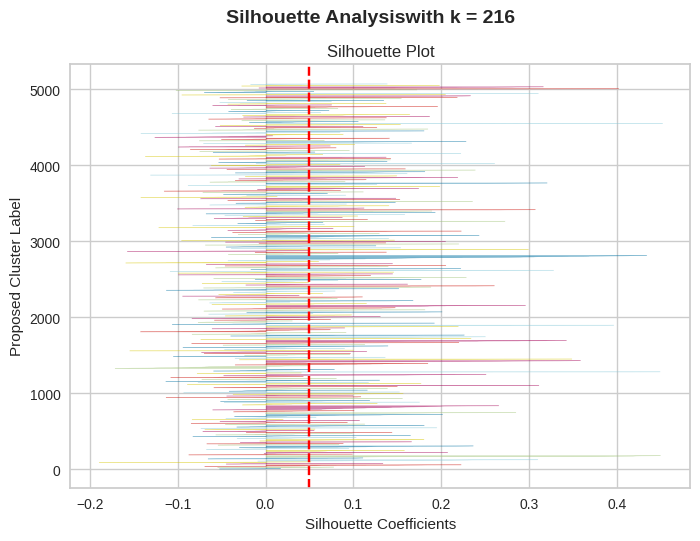

For k = 228
 Mean silhouette_avg = 0.050576526671648026


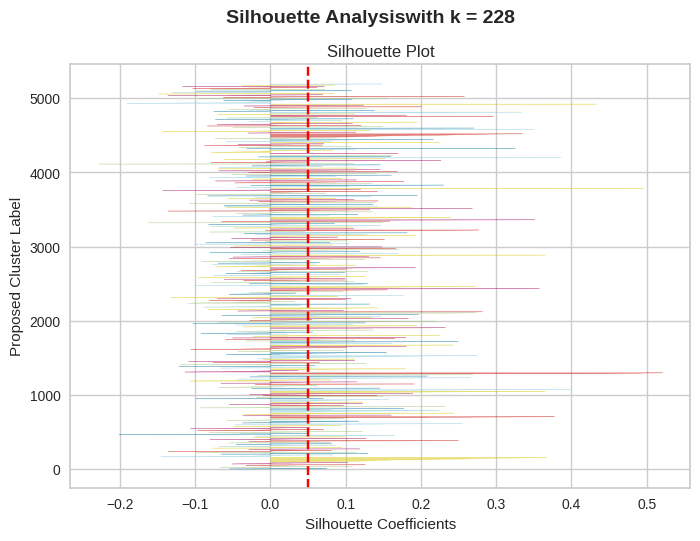

For k = 240
 Mean silhouette_avg = 0.047725968062877655


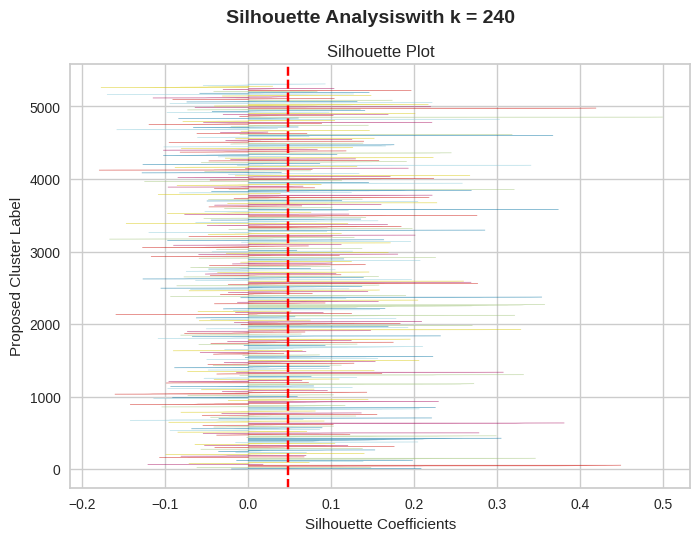

For k = 252
 Mean silhouette_avg = 0.050502922385931015


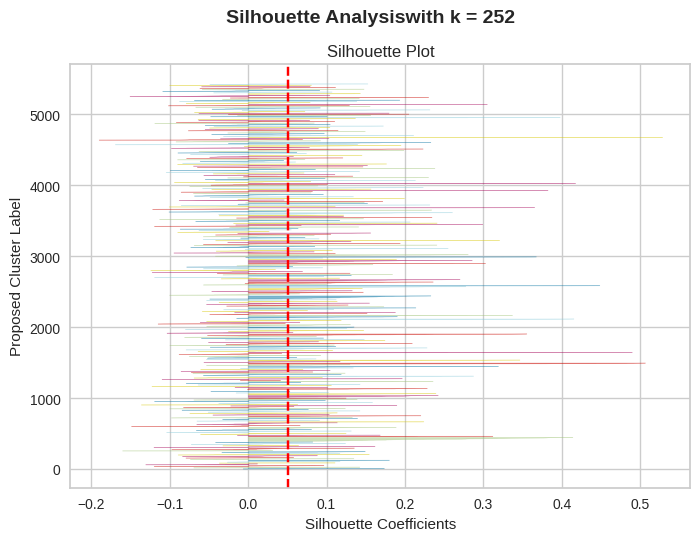

For k = 264
 Mean silhouette_avg = 0.043510910123586655


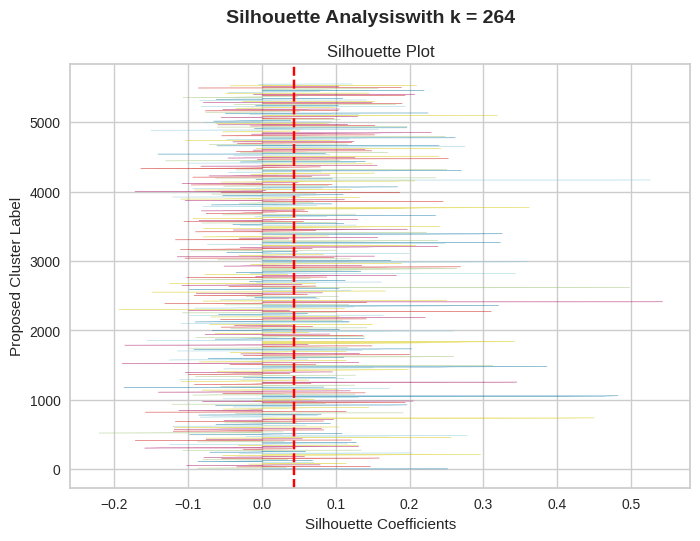

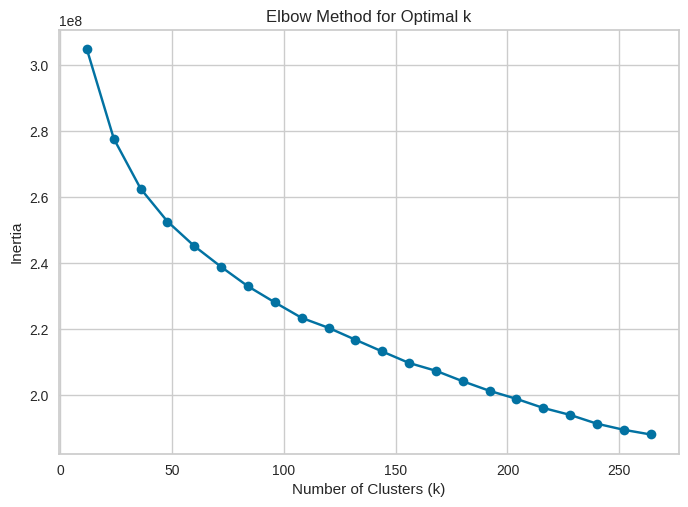

In [4]:
#funzioni di tuning per le visual_words
k_list = [x for x in range(12,268,12)]
inertia_values = []

fig = figsize=(15, 15)
for k in k_list:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(all_descriptors)
    inertia_values.append(kmeans.inertia_)
    score = silhouette_score(all_descriptors, kmeans.labels_)
    print("For k = {}\n Mean silhouette_avg = {}" .format(k, score))
    plt.title("Silhouette Plot")
    plt.xlabel("Silhouette Coefficients")
    plt.ylabel("Proposed Cluster Label")
    plt.suptitle(("Silhouette Analysis"
                  "with k = %d" % k),
                 fontsize=14, fontweight='bold')
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(all_descriptors)
    plt.show()

  # Plot inertia values
plt.plot(k_list, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [5]:
#Cluster descriptors per visual words (vocabulary)
k = 60 #tuning necessario
kmeans = KMeans(n_clusters=k)
kmeans.fit(all_descriptors)
visual_words = kmeans.cluster_centers_

Represent each image of the training set as a normalized histogram having
k bins, each corresponding to a visual word; a possibility is to perform a
rather dense sampling in space and scale; another possibility is to use the
3SIFT detector to find the points in scale-space where the descriptor is
computed. In any case, each computed descriptor will increase the value
of the bin corresponding to the closest visual word.

In [6]:
#da ottimizzare il codice
train_histograms = []
for image_path in images_training:
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    sift = cv2.SIFT_create() # non so se sia necessario ricalcolare il sift e se serva lo stesso numero di punti
    keypoints, descriptors = sift.detectAndCompute(image, None)

    hist = np.zeros(k)
    if descriptors is not None:
        for descriptor in descriptors:
            distances = np.linalg.norm(visual_words - descriptor, axis=1)
            visual_word_index = np.argmin(distances)
            hist[visual_word_index] += 1

    hist = hist / np.sum(hist)  #normalizzo l'istogramma
    train_histograms.append(hist)

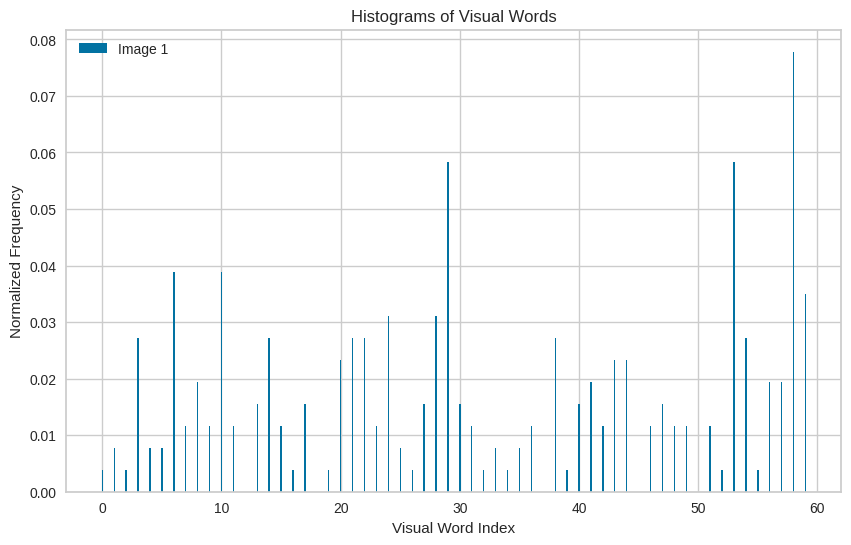

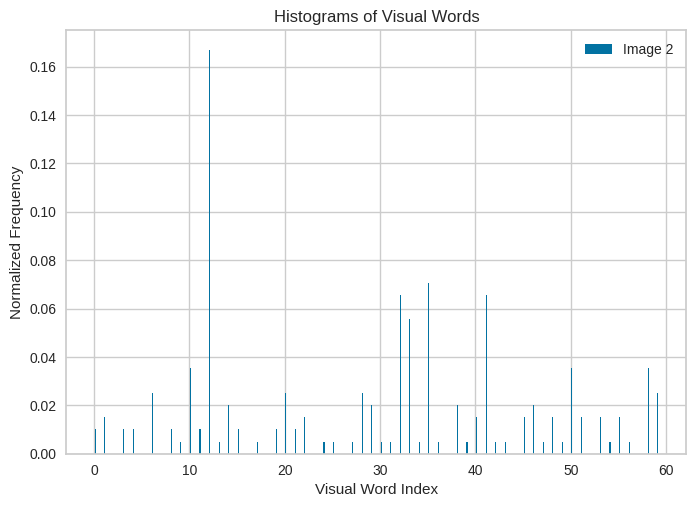

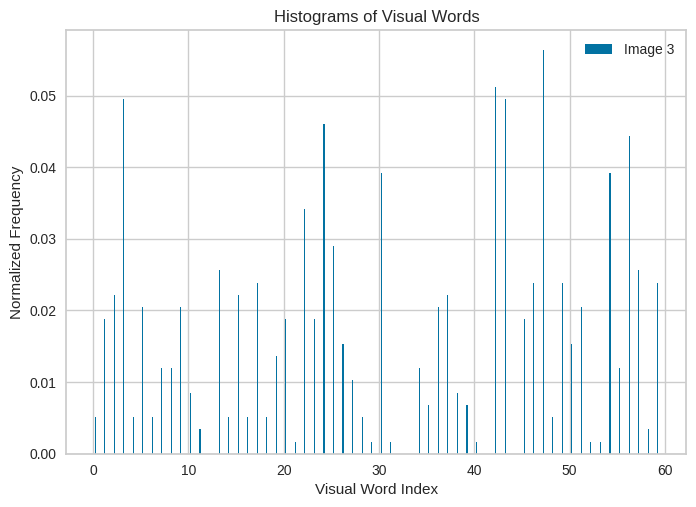

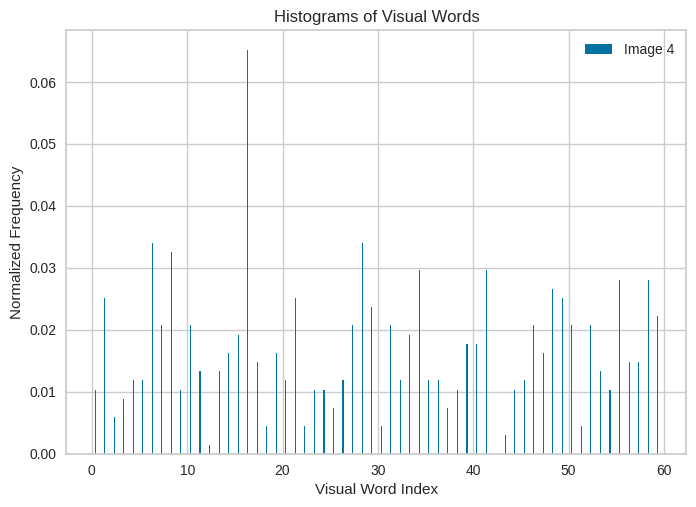

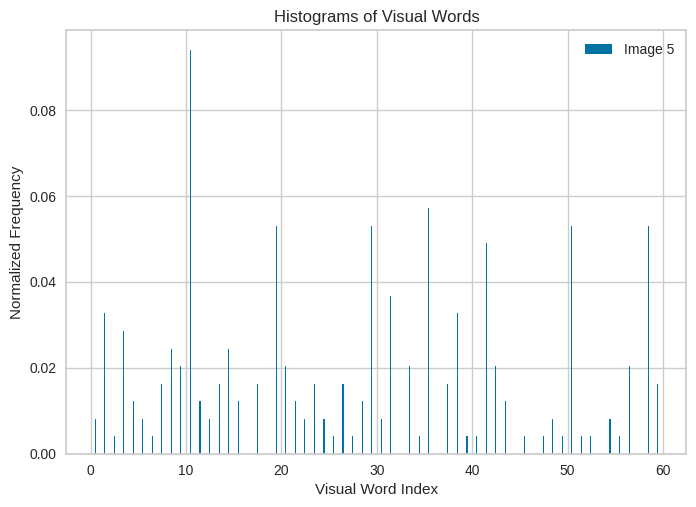

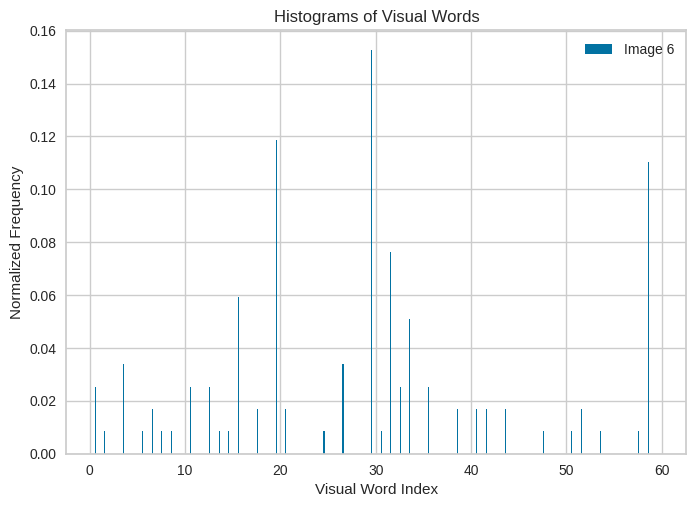

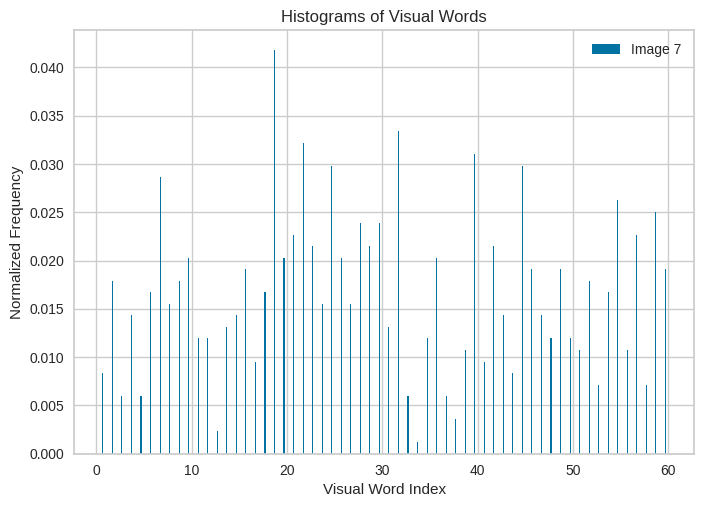

In [7]:
plt.figure(figsize=(10, 6))
n_histograms = len(train_histograms)
width = 0.8/n_histograms
for idx, hist in enumerate(train_histograms):
    x_positions = np.arange(len(hist))+ idx*width
    plt.bar(x_positions, hist,width=width, label=f'Image {idx + 1}')
    plt.title('Histograms of Visual Words')
    plt.xlabel('Visual Word Index')
    plt.ylabel('Normalized Frequency')
    plt.legend()
    plt.show()


Employ a nearest neighbor classifier and evaluate its performance:
• compute the normalized histogram for the test image to be classified;
• assign to the image the class corresponding to the training image
having the closest histogram.
• repeat for all the test images and build a confusion matrix.

In [ ]:
#Carico le immagini di test
cartella_test = '/home/eva/Scrivania/esame_cv/test'
images_test, test_labels  = carica_immagini_e_etichette(cartella_test)

In [7]:
#istogrammi test
test_histograms = []
for image_path in images_test:
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)

    hist = np.zeros(k)
    if descriptors is not None:
        for descriptor in descriptors:
            distances = np.linalg.norm(visual_words - descriptor, axis=1)
            visual_word_index = np.argmin(distances)  #forse da cambiare non so
            hist[visual_word_index] += 1

    hist = hist / np.sum(hist)
    test_histograms.append(hist)

In [8]:
knn = NearestNeighbors(n_neighbors=2) #ho usato un numero a caso
knn.fit(train_histograms)

# Find the nearest neighbors and classify based on the closest training image
predictions = knn.kneighbors(test_histograms, return_distance=False)
predicted_labels = [train_labels[i[0]] for i in predictions]

In [10]:
print(predicted_labels)
print(test_labels)

['Home', 'Bedroom']
['Bedroom', 'Coast']


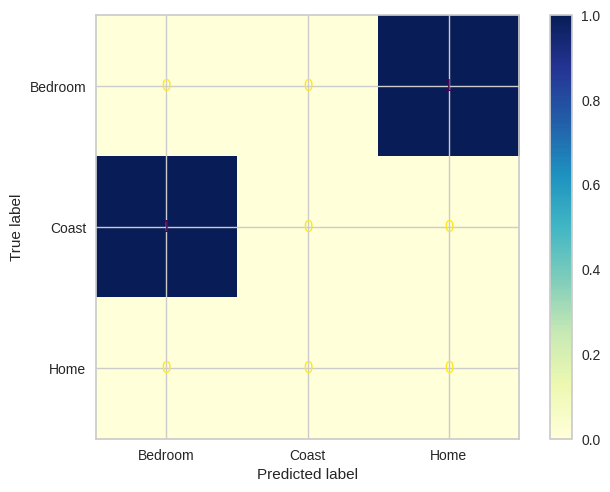

In [9]:
cm = metrics.confusion_matrix(test_labels, predicted_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(test_labels + predicted_labels))
cm_display.plot()
im = cm_display.im_
im.set_cmap('YlGnBu')
plt.show()

Train a multiclass linear Support Vector Machine, using the one-vs-rest
approach (you will need to train 15 binary classifiers having the normalized
histograms as the input vectors and positive labels for the “one” class and
negative for the “rest.”)

In [31]:
#training singole svm
#shuffle dei dati!
X_train = np.array(train_histograms)
rd.shuffle(X_train)
y_train = np.array(train_labels)
n_classes = len(np.unique(y_train))

#labels binarie
y_train_bin = []
for obj in train_labels:
    binary_row = [1 if obj == u_obj else 0 for u_obj in np.unique(y_train)]
    y_train_bin.append(binary_row)
y_train_bin = np.array(y_train_bin)

classifiers = []
support_vectors = []
for i in range(n_classes):
    svm = SVC(kernel='linear', probability=True)
    svm.fit(X_train, y_train_bin[:,i])
    support_vectors.append(svm.support_vectors_)
    classifiers.append(svm)




5. Evaluate the multiclass SVM:
• compute the normalized histogram for the test image to be classified;
• compute the real-valued output of each of the SVMs, using that his-
togram as input;
• assign to the image the class corresponding to the SVM having the
greatest real-valued output.
• repeat for all the test images and build a confusion matrix.

In [11]:
#test
X_test = np.array(test_histograms) #gli istogrammi sono stati generati in precedenza
rd.shuffle(X_test)

predictions = []
# scores ha come righe le immagini di test, come colonne i classificatori, uso il trasposto per calcolare il max
scores = np.array([clf.decision_function(X_test) for clf in classifiers]).T
for i in range(len(X_test)):
    predicted_label = np.argmax(scores[i])
    predictions.append(predicted_label)

In [12]:
#converto label in text per agevolare la lettura
labels = np.unique(y_train)
print(labels)
predict_labels = [labels[prediction] for prediction in predictions]
print(predict_labels)

['Bedroom' 'Coast' 'Home' 'Market' 'Office']
['Home', 'Home']


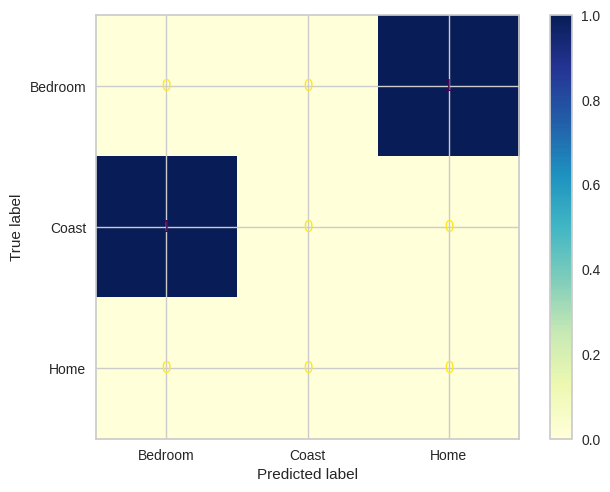

In [13]:
cm = metrics.confusion_matrix(test_labels, predicted_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(test_labels + predicted_labels))
cm_display.plot()
im = cm_display.im_
im.set_cmap('YlGnBu')
plt.show()

**EXTRA**
6. svm cambio kernel ---- tralascia che fa danni ci riprovo più tardi

In [33]:
def my_kernel(x, x_prime, A):
  D = np.sum(((x - x_prime) ** 2) / (x + x_prime + 1e-10))
  return np.exp(-D/A)

In [37]:

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Step 1: Define the Chi-Squared distance function
def chi_squared_distance(x, y):
    """
    Compute the Chi-Squared distance between two vectors x and y.
    D(x, y) = sum((x_i - y_i)^2 / (x_i + y_i))
    """
    return 0.5 * np.sum(((x - y)**2) / (x + y + 1e-10))  # Add small epsilon to avoid division by zero

# Step 2: Create a custom kernel that uses the support vectors
class SupportVectorChiSquaredKernel:
    def init(self, A=1.0):
        self.A = A
        self.support_vectors_ = None

    def fit(self, X, y):
        # Fit an SVC to get the support vectors
        self.svc = SVC(kernel='linear')  # Use a simple linear kernel to train the model
        self.svc.fit(X, y)
        self.support_vectors_ = self.svc.support_vectors_

    def call(self, x, y):
        """
        Custom kernel function k(x, x') = exp(-D(x, x') / A), where D is the Chi-Squared distance between x and support vectors.
        """
        # Calculate the kernel between point x and the support vectors
        k = 0
        for support_vector in self.support_vectors_:
            distance = chi_squared_distance(x, support_vector)
            k += np.exp(-distance / self.A)
        return k

# Step 3: Create a simple 2D classification dataset
X, y = X_train, y_train_bin[:,0]

# Step 4: Use the custom kernel
custom_kernel = SupportVectorChiSquaredKernel()

# Train the model using the custom kernel (this requires the fit method to first calculate support vectors)
custom_kernel.fit(X, y)

# Step 5: Create the SVC with the custom kernel
svc_custom = SVC(kernel=custom_kernel)  # Use the custom kernel we defined
svc_custom.fit(X, y)

# Step 6: Predict using the custom kernel
x_new = np.array([[0, 1]])  # Example new point
prediction_custom = svc_custom.predict(x_new)

# Print the predicted class for the new point
print("\nPredicted class for the new point (custom kernel):", prediction_custom)

# Step 7: Visualize the support vectors and the decision boundary
support_vectors = svc_custom.support_vectors_

# Create a grid to evaluate the decision function over
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Z = svc_custom.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the data points, decision boundary, and support vectors
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')  # Decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', label='Data points')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='yellow', label='Support Vectors', s=100, edgecolors='black')
plt.scatter(x_new[:, 0], x_new[:, 1], color='green', label='New Point', s=200, marker='X')
plt.legend()
plt.title('SVM with Custom Chi-Squared Kernel - Decision Boundary and New Point')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

InvalidParameterError: The 'kernel' parameter of SVC must be a str among {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or a callable. Got <__main__.SupportVectorChiSquaredKernel object at 0x7b9ea9f23150> instead.

In [32]:
classifiers = []
for i in range(n_classes):
    svm = SVC(kernel='linear', probability=True)
    svm.fit(X_train, y_train_bin[:,i])
    support_vectors.append(svm.support_vectors_)

    classifiers.append(svm)



ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.

In [23]:
import numpy as np
from sklearn.svm import SVC

# Step 1: Chi-squared distance function
def chi_squared_distance(x, x_prime):
    return np.sum(((x - x_prime) ** 2) / (x + x_prime + 1e-10))  # Adding small epsilon to avoid division by zero

# Step 2: Custom Kernel Function
def chi_squared_kernel(x, x_prime, A):

    D = chi_squared_distance(x, x_prime)
    return np.exp(-D / A)

# Step 3: Define the SVM classifier with custom kernel
class ChiSquaredSVM(SVC):
    def init(self, A=1.0, **kwargs):
        super().init(kernel='precomputed', **kwargs)
        self.A = A

    def fit(self, X, y):
        # Compute the kernel matrix for the training data
        kernel_matrix = np.array([[chi_squared_kernel(xi, xj, self.A) for xi in X] for xj in X])
        super().fit(kernel_matrix, y)

    def predict(self, X):
        # Compute the kernel matrix for new data with the training set
        kernel_matrix = np.array([[chi_squared_kernel(xi, xj, self.A) for xi in X] for xj in self.support_vectors_])
        return super().predict(kernel_matrix)


In [24]:
#A_values = [0.2, 0.5, 1.0, 1.5]
for i in range(n_classes):
  svm = ChiSquaredSVM()
  svm.fit(X_train, y_train_bin[:,i])

AttributeError: 'ChiSquaredSVM' object has no attribute 'A'

8. soft assigment

In [ ]:
#devo sistemarlo non so se faccio in tempo
def soft_assignment(descriptors, cluster_centers, bandwidth=1.0):

    num_descriptors = descriptors.shape[0]
    num_bins = cluster_centers.shape[0]

    histogram = np.zeros(num_bins)
    for i in range(num_descriptors):
        descriptor = descriptors[i]
        distances = np.linalg.norm(cluster_centers - descriptor, axis=1)
        weights = np.exp(-distances  2 / (2 * bandwidth  2))

        histogram += weights
    histogram /= np.sum(histogram)

    return histogram


In [ ]:
num_descriptors = 100
descriptor_dim = 128
descriptors = np.random.rand(num_descriptors, descriptor_dim)

num_bins = 60
kmeans = KMeans(n_clusters=num_bins, random_state=0).fit(descriptors)
cluster_centers = kmeans.cluster_centers_

histogram = soft_assignment(descriptors, cluster_centers)
print("Soft assignment histogram:", histogram)